### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inspect
import pickle

### Load data

In [2]:
print(sum(metadata['number_of_nn_within_radius']) / len(metadata['number_of_nn_within_radius']))

NameError: name 'metadata' is not defined

### Scheduler Graphs

In [101]:
db_size = 10 ** 5
domain = 10 ** 7

input_dir = f'graphs/schedulers/scheduler_1.6/size_{db_size}_domain_{domain}/'
output_dir = f'graphs/schedulers/inverse/'
raw_df = pd.read_csv(f'{input_dir}raw.csv')

with open(f'{input_dir}metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [102]:
raw_df = raw_df[raw_df['scheduler_type'].isin(['constant', 'inverse_sqrt', 'inverse_linear', 'inverse_quadratic'])]

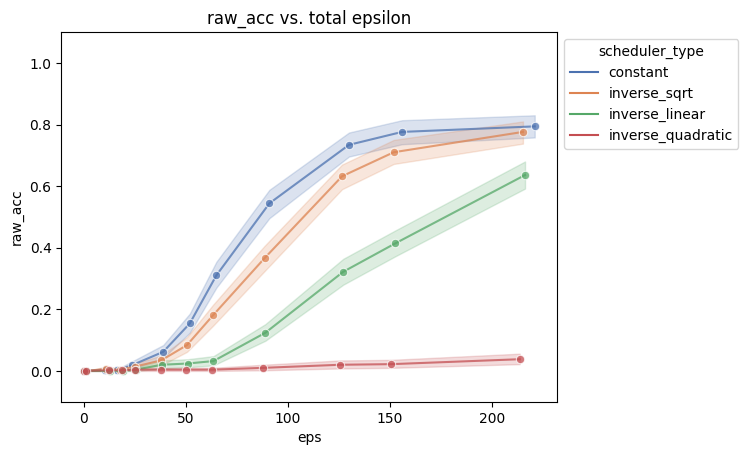

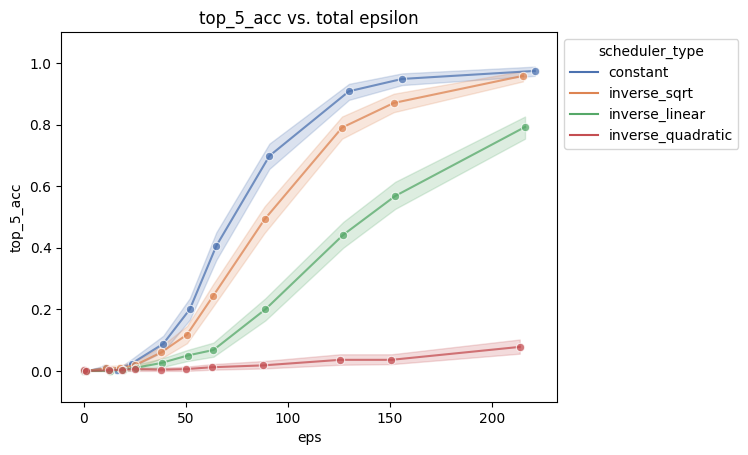

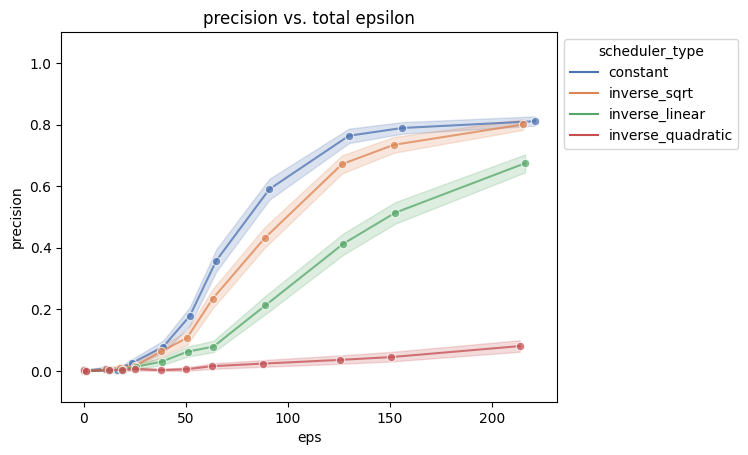

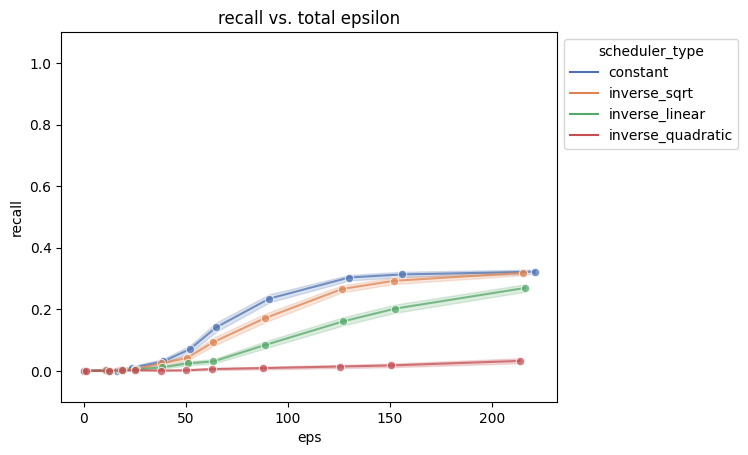

In [103]:
for metric in ['raw_acc', 'top_5_acc', 'precision', 'recall']: # precision and recall considers top K values relevant

    # plot for both DP-TT and LDP
    plot = sns.lineplot(
        data=raw_df, x='eps', y=f'{metric}', 
        hue='scheduler_type',
        palette='deep', alpha=0.75, marker='o',
    )

    # graph params
    plot.set(
        ylim=(-0.1, 1.1),
        title=f'{metric} vs. total epsilon'
    )

    # move legend
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

    # save plot
    plot.get_figure().savefig(f'{output_dir}{metric}.png', bbox_inches='tight', dpi=400)
    plot.get_figure().clf()

### Density graphs

In [63]:
db_size = 10 ** 5
domain = 10 ** 7

output_dir = f'graphs/densities/size_{db_size}_domain_{domain}/'
raw_df = pd.read_csv(f'{output_dir}raw.csv')

with open(f'{output_dir}metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [64]:
# raw_df = raw_df[raw_df['method'].isin(['DP-TT-CMP', 'LAPLACE-GEO'])]
raw_df = raw_df[raw_df['method'].isin(['DP-TT-CMP', 'LAPLACE', 'L-SRR'])]

In [65]:
raw_df['eps'].value_counts()

eps
52.264529     1500
65.330661     1500
250.871106    1500
0.087783      1500
0.892835      1500
10.403934     1500
16.771890     1500
23.823343     1500
39.198396     1500
47.618447     1500
91.462925     1500
38.094757     1500
130.661321    1500
156.793586    1500
222.124246    1500
0.076744      1500
0.778912      1500
8.915850      1500
14.260088     1500
19.047379     1500
177.085486    1500
147.571239    1500
103.299867    1500
0.092379      1500
161.902719    1500
114.284272    1500
95.236893     1500
66.665825     1500
73.785619     1500
28.571068     1500
0.940395      1500
11.038646     1500
17.851945     1500
25.427000     1500
42.470321     1500
59.028495     1500
164.041375     909
278.870338     894
196.849650     882
82.020688      849
114.828963     840
11.620769      831
0.096537       789
65.436299      780
0.983506       768
26.909379      765
45.124627      765
18.846830      756
18.358975      744
43.820272      735
26.181869      735
0.962448       732
62.34313

In [59]:
frequent_values_index = raw_df['eps'].value_counts()[raw_df['eps'].value_counts() > 200].index

In [60]:
raw_df = raw_df[raw_df['eps'].isin(frequent_values_index)]

In [61]:
# change early_stopping_level to return_size
for early_stopping_level in [1, 3, 5, 9]:
    raw_df.loc[raw_df['early_stopping_level'] == early_stopping_level, 'return_size'] = raw_df[raw_df['early_stopping_level'] == early_stopping_level]['return_size'].mean()

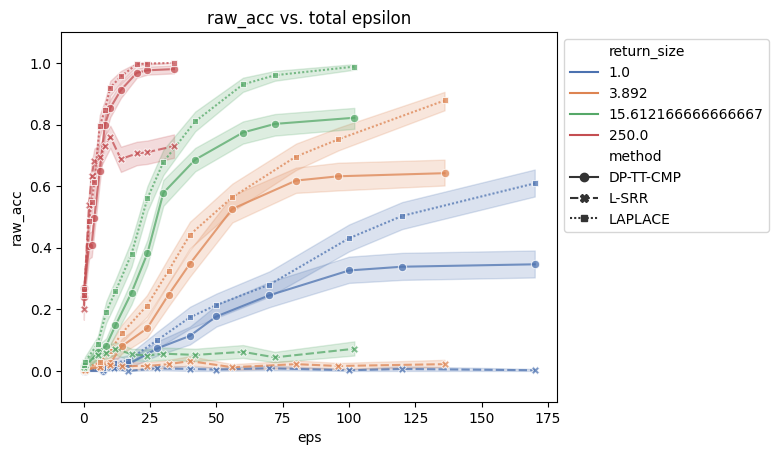

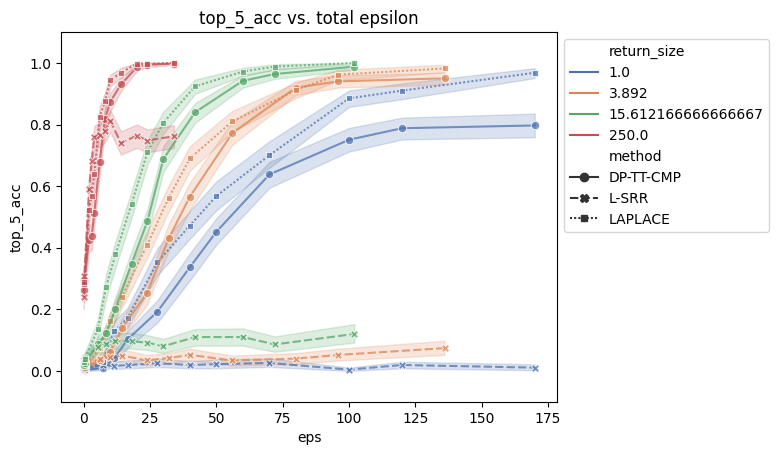

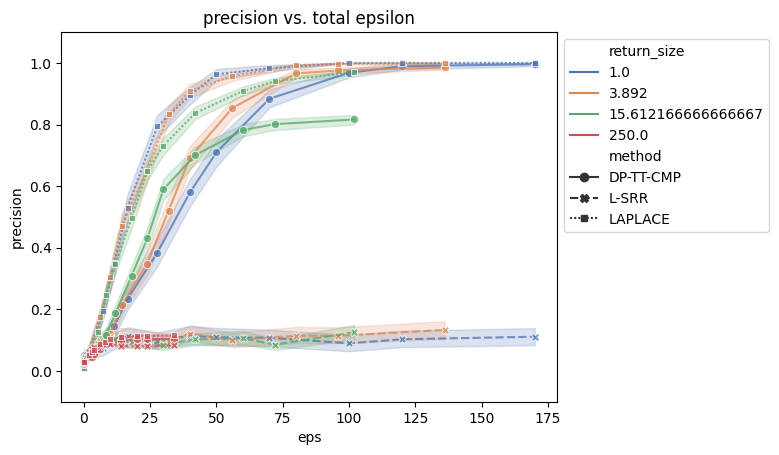

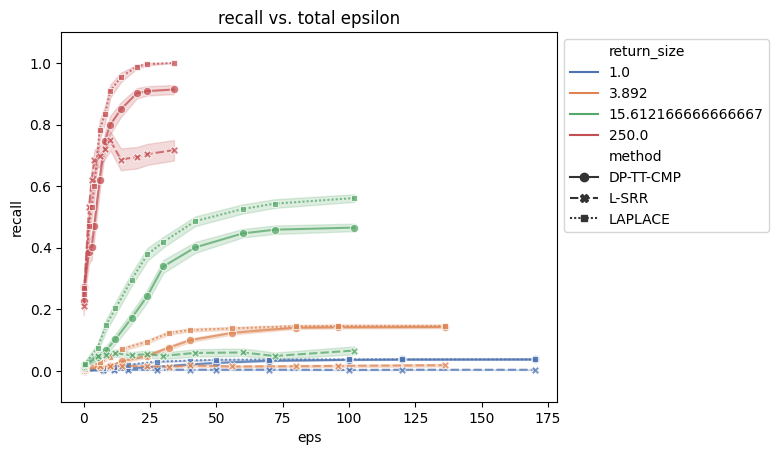

In [62]:
for metric in ['raw_acc', 'top_5_acc', 'precision', 'recall']: # precision and recall considers top K values relevant

    # plot for both DP-TT and LDP
    plot = sns.lineplot(
        data=raw_df, x='eps', y=f'{metric}', 
        hue='return_size', style='method', markers=True,
        palette='deep', alpha=0.75,
    )

    # graph params
    plot.set(
        ylim=(-0.1, 1.1),
#         xlim=(0, 10),
        title=f'{metric} vs. total epsilon'
    )

    # move legend
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

    # save plot
    plot.get_figure().savefig(f'{output_dir}{metric}.png', bbox_inches='tight', dpi=400)
    plot.get_figure().clf()

### DIS Exploration

In [190]:
db_size = 10 ** 4
domain = 10 ** 7

output_dir = f'graphs/densities/size_{db_size}_domain_{domain}/'
raw_df = pd.read_csv(f'{output_dir}raw.csv')

with open(f'{output_dir}metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [191]:
raw_df = raw_df[raw_df['method'].isin(['DP-TT-CMP', 'LAPLACE-GEO'])]
# raw_df = raw_df[raw_df['method'].isin(['DP-TT-CMP', 'LAPLACE', 'L-SRR'])]

In [192]:
for early_stopping_level in [1, 3, 5, 9]:
    raw_df.loc[raw_df['early_stopping_level'] == early_stopping_level, 'return_size'] = raw_df[raw_df['early_stopping_level'] == early_stopping_level]['return_size'].mean()

In [195]:
raw_df['geo_eps'] = (raw_df['geo_eps'] / 500).round().astype(int) * 500

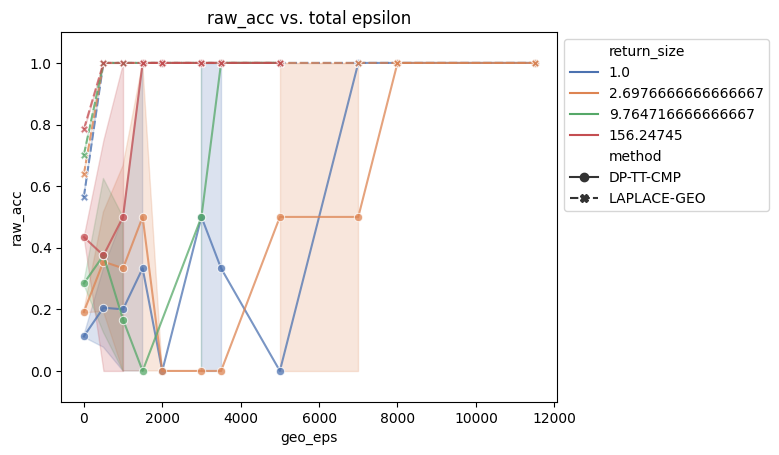

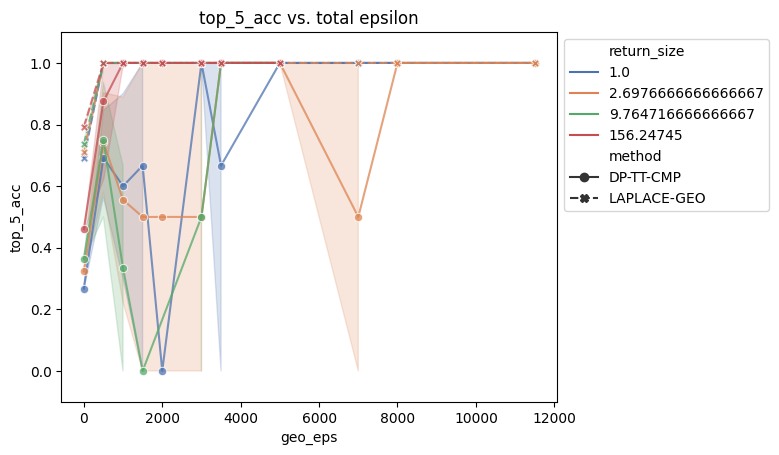

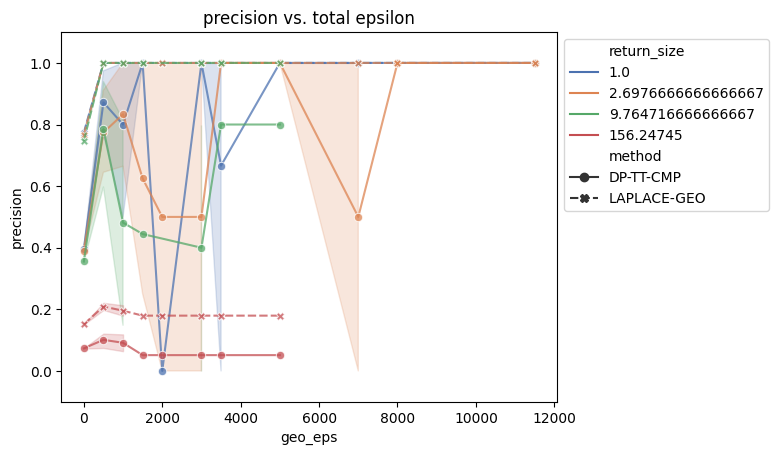

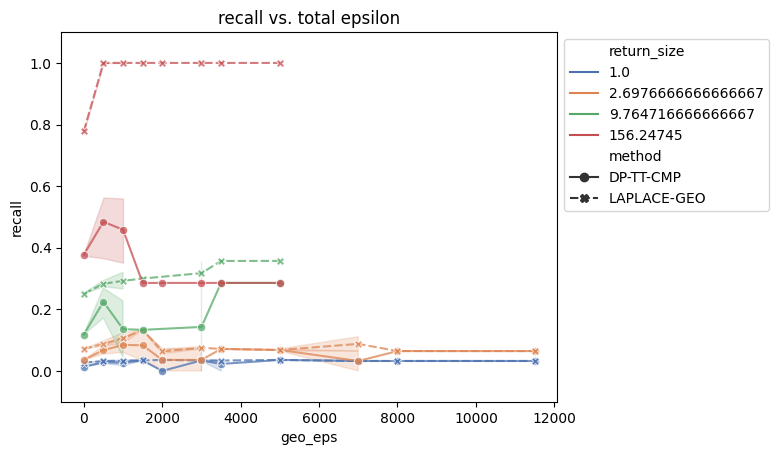

In [196]:
for metric in ['raw_acc', 'top_5_acc', 'precision', 'recall']: # precision and recall considers top K values relevant

    # plot for both DP-TT and LDP
    plot = sns.lineplot(
        data=raw_df, x='geo_eps', y=f'{metric}', 
        hue='return_size', style='method', markers=True,
        palette='deep', alpha=0.75,
    )

    # graph params
    plot.set(
        ylim=(-0.1, 1.1),
#         xlim=(0, 10),
        title=f'{metric} vs. total epsilon'
    )

    # move legend
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

    # save plot
    plot.get_figure().savefig(f'{output_dir}{metric}_dis.png', bbox_inches='tight', dpi=400)
    plot.get_figure().clf()